In [4]:
# Solving the stochastic Optimal Growth model by Value Function Interation 
# adapted from Fabrice Collard's Matlab code, http://fabcol.free.fr/
# tested in Julia 1.11
# this code is part of chapter 4, "Dynamic Programming" from the book: "Introduction to Quantitative Macroeconomics with Julia"
# Academic Press - Elsevier
# for comments, email at: petre(dot)caraiani(at)gmail(dot)com

#packages
#Pkg.add("Plots")
using Plots;
using LinearAlgebra;

sigma   = 1.5;
delta   = 0.1;
beta    = 0.95;
alpha   = 0.30;
p       = 0.9;
PI      = [p 1-p;1-p p];
se      = 0.2;
ab      = 0;
am      = exp(ab-se);
as      = exp(ab+se);
A       = [am as];
nba     = 2;


In [6]:
ks    = ((1-beta*(1-delta))/(alpha*beta))^(1/(alpha-1));
csy   = 1-alpha*beta*delta/(1-beta*(1-delta));
dev   = 0.9;
kmin  = (1-dev)*ks;
kmax  = (1+dev)*ks;
nbk   = 1000;
devk  = (kmax-kmin)/(nbk-1);
k     = collect(LinRange(kmin,kmax,nbk));
kp    = zeros(nbk, nba);
c     = zeros(nbk,nba);
u     = zeros(nbk,nba);
v     = zeros(nbk,nba);
Tv    = zeros(nbk,nba);
iter  = 1;
crit  = 1;
tol   = 1e-6;
dr    = zeros(nbk,nba);             # decision rule (will contain indices)

In [11]:
#iterate on Value Function
while crit>tol
for i=1:nbk
    for j=1:nba
         c        = A[j]*k[i]^alpha+(1-delta)*k[i].-k;
         neg      = findall(x -> x <=0.0,c);     
         c[neg].= NaN;
         u[:,j]   = (c.^(1-sigma).-1)/(1-sigma);
         u[neg,j].= -1e12;  
    end;
         u_obj = u+beta*(v*PI)
   
        (tv1,dr1) = findmax(u_obj[:,1], dims=1)
        (tv2,dr2) = findmax(u_obj[:,2], dims=1)

        dr[i,1] = dr1[1]; dr[i,2] = dr2[1];
        Tv[i,1] = tv1[1]; Tv[i,2] = tv2[1]; 
         
end;
   
   error = abs.(Tv-v);
   crit  = maximum((error));
   v     = copy(Tv);
   iter  = iter+1;
end;

In [12]:
#solution
for i=1:nbk 
   for j=1:nba 
   
   index=trunc(Int, dr[i,j]);
   kp[i,j]= k[index];
        
   end;       
end;

In [13]:
#solution
c     = zeros(nbk,nba);
for j=1:nba;
   c[:,j] = A[j]*k.^alpha.+(1-delta)*k-kp[:,j];
end
u    = (c.^(1-sigma).-1)./(1-sigma);
v    = u./(1-beta);

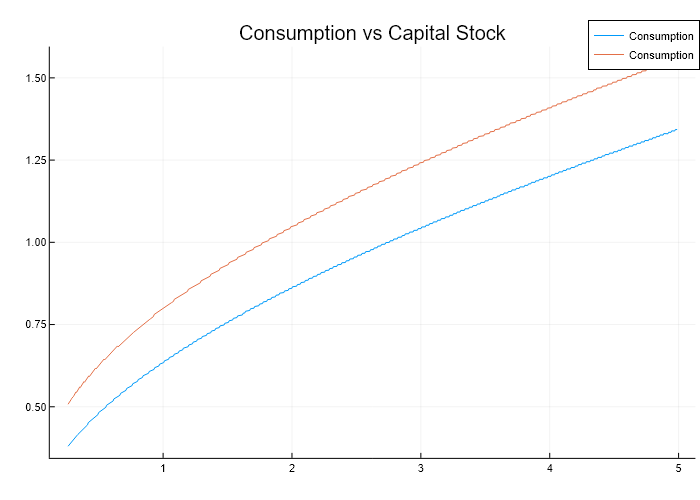

In [14]:
plotlyjs() # Choose the Plotly.jl backend for web interactivity
#plot(k',c',linewidth=1,label="Consumption",title="Consumption vs capital stock")
plot(k,c, linewidth=1,title="Consumption vs Capital Stock", label="Consumption")
